In [2]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["figure.dpi"] = 250
sns.set_style("darkgrid")

In [13]:
air = pd.read_csv("airline-passengers.csv", index_col = 0, parse_dates = True)
air

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


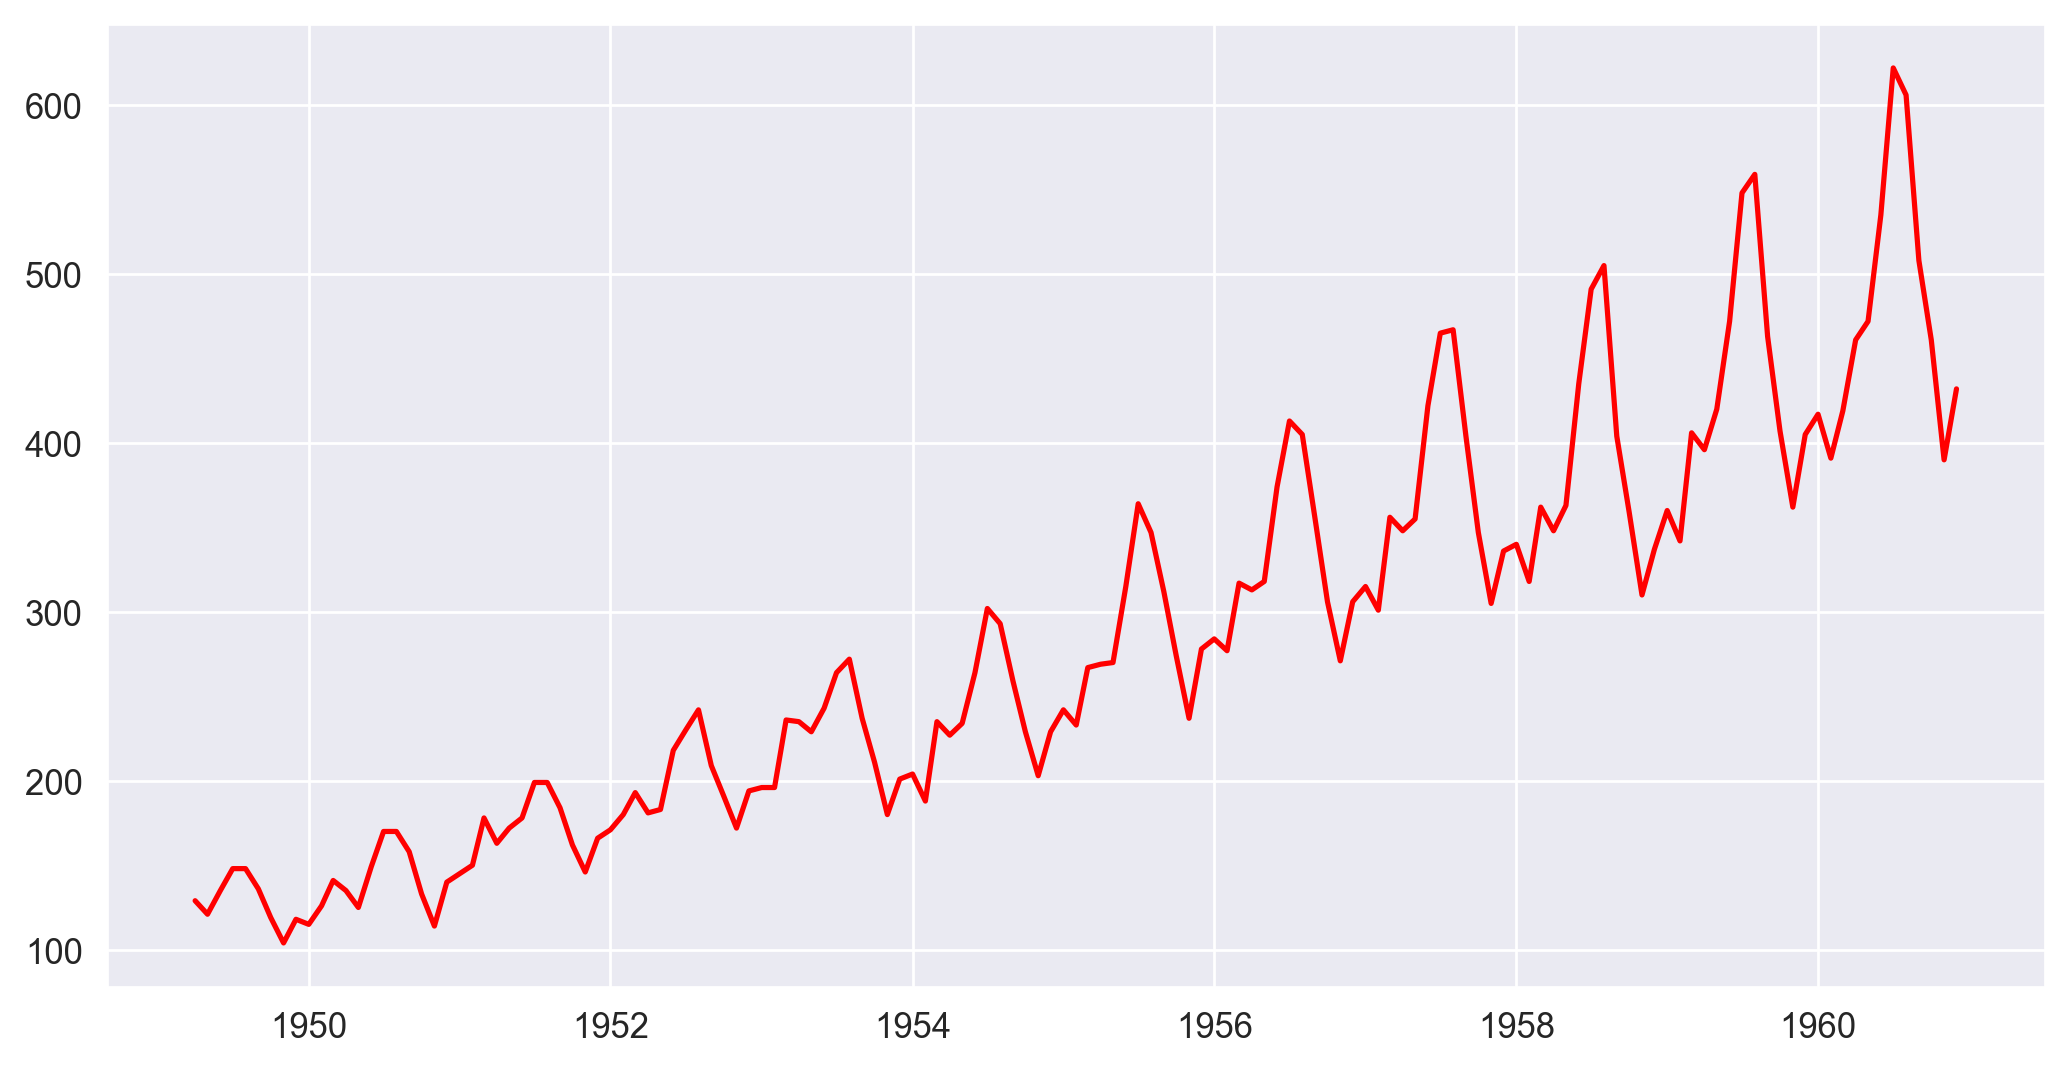

In [26]:
plt.plot(air["Passengers"], color = "red");


In [29]:
air.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140 entries, 1949-05-01 to 1960-12-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  140 non-null    int64  
 1   First       140 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.3 KB


In [30]:
air["First"] = air["Passengers"].diff(periods = 1)
air

,Passengers,First
Month,,
1949-05-01,121,NaN
1949-06-01,135,14.0
1949-07-01,148,13.0
1949-08-01,148,0.0
1949-09-01,136,-12.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [31]:
air.dropna(inplace = True )
air

,Passengers,First
Month,,
1949-06-01,135,14.0
1949-07-01,148,13.0
1949-08-01,148,0.0
1949-09-01,136,-12.0
1949-10-01,119,-17.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


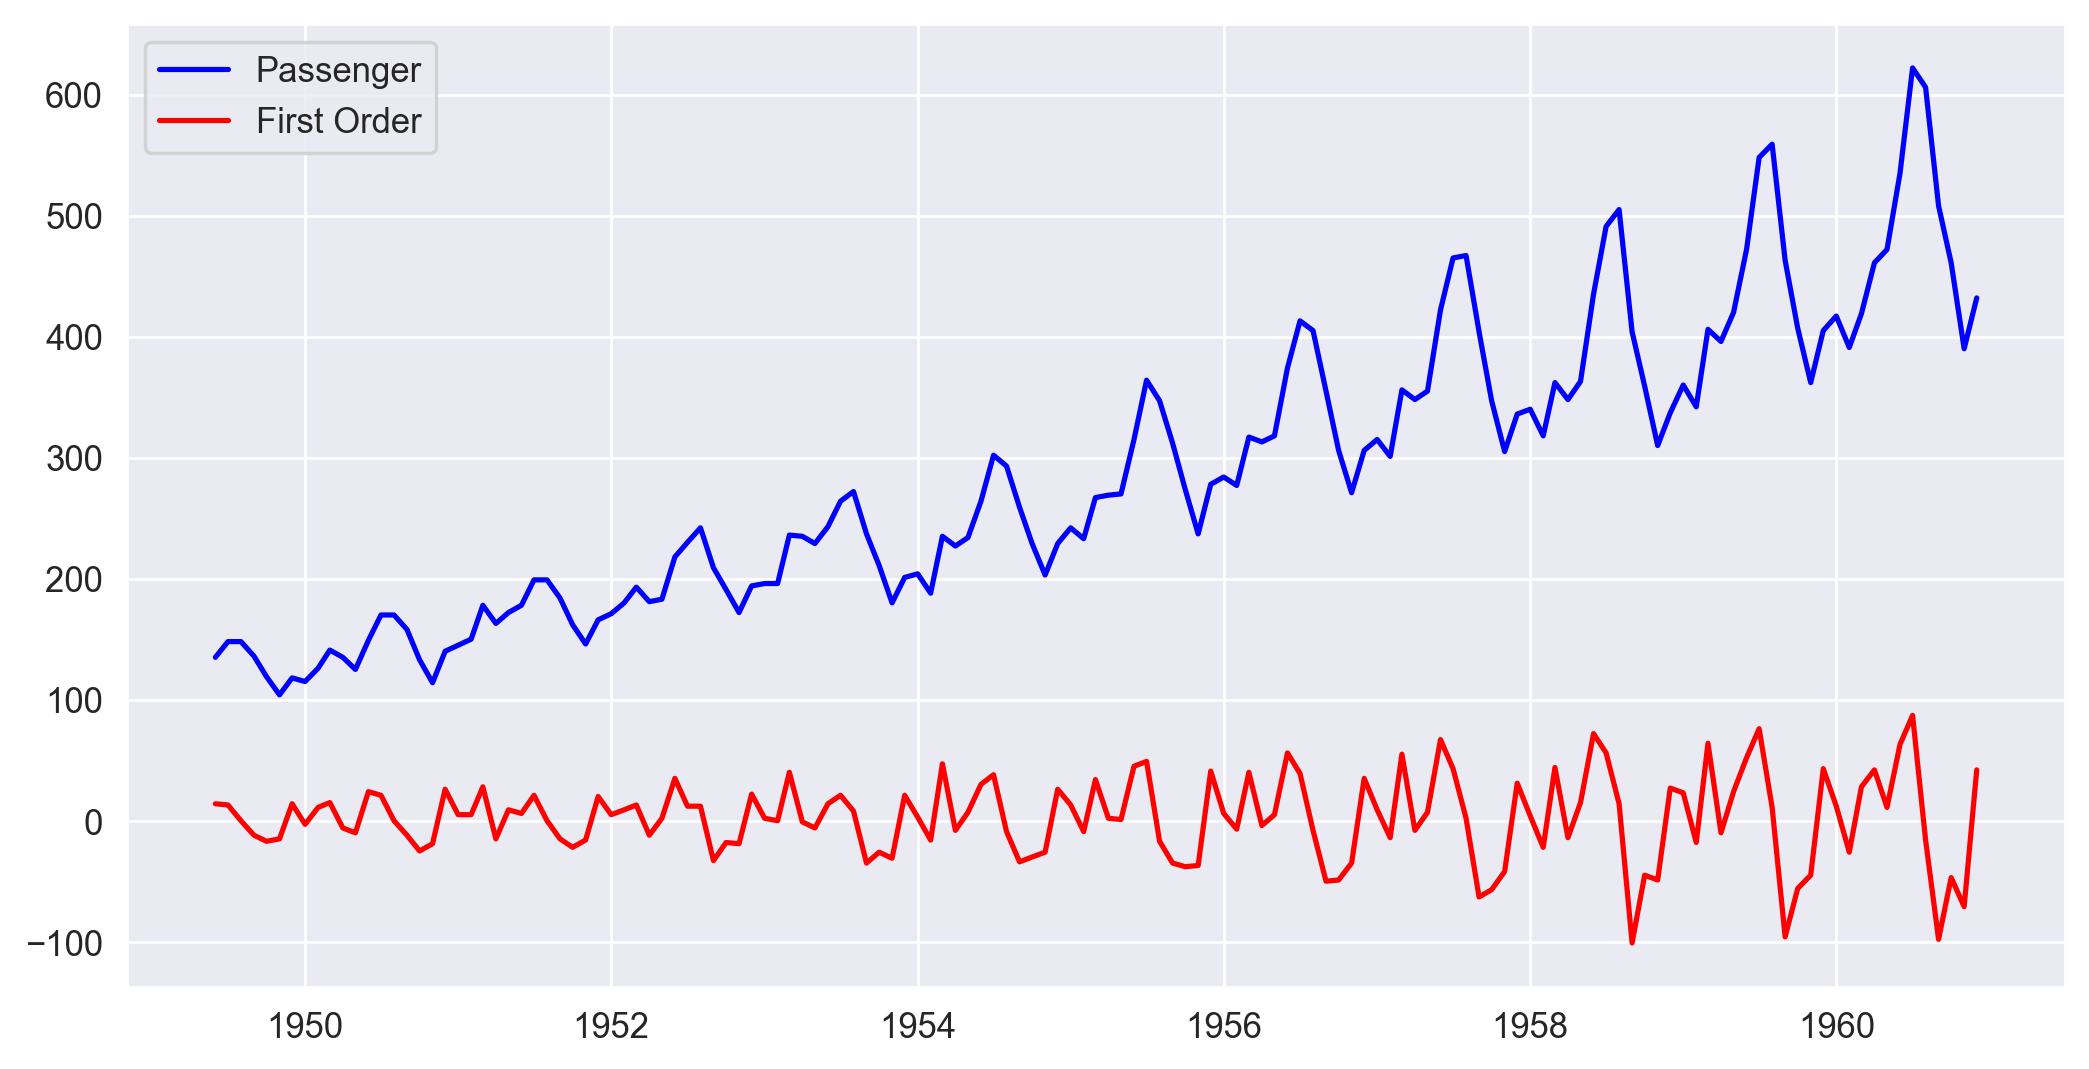

In [35]:
plt.plot(air["Passengers"], color = "blue", label = "Passenger")
plt.plot(air["First"], color = "red", label = "First Order")
plt.legend()

In [36]:
acf_values = acf(air["First"])
acf_values

array([ 1.        ,  0.30391017, -0.10039631, -0.24210972, -0.30296376,
       -0.09600708, -0.07920811, -0.09060556, -0.29356819, -0.1921858 ,
       -0.10390145,  0.28280551,  0.82846335,  0.2862876 , -0.1029599 ,
       -0.22335569, -0.23433161, -0.06485091, -0.06744203, -0.08742608,
       -0.29450636, -0.16398999])

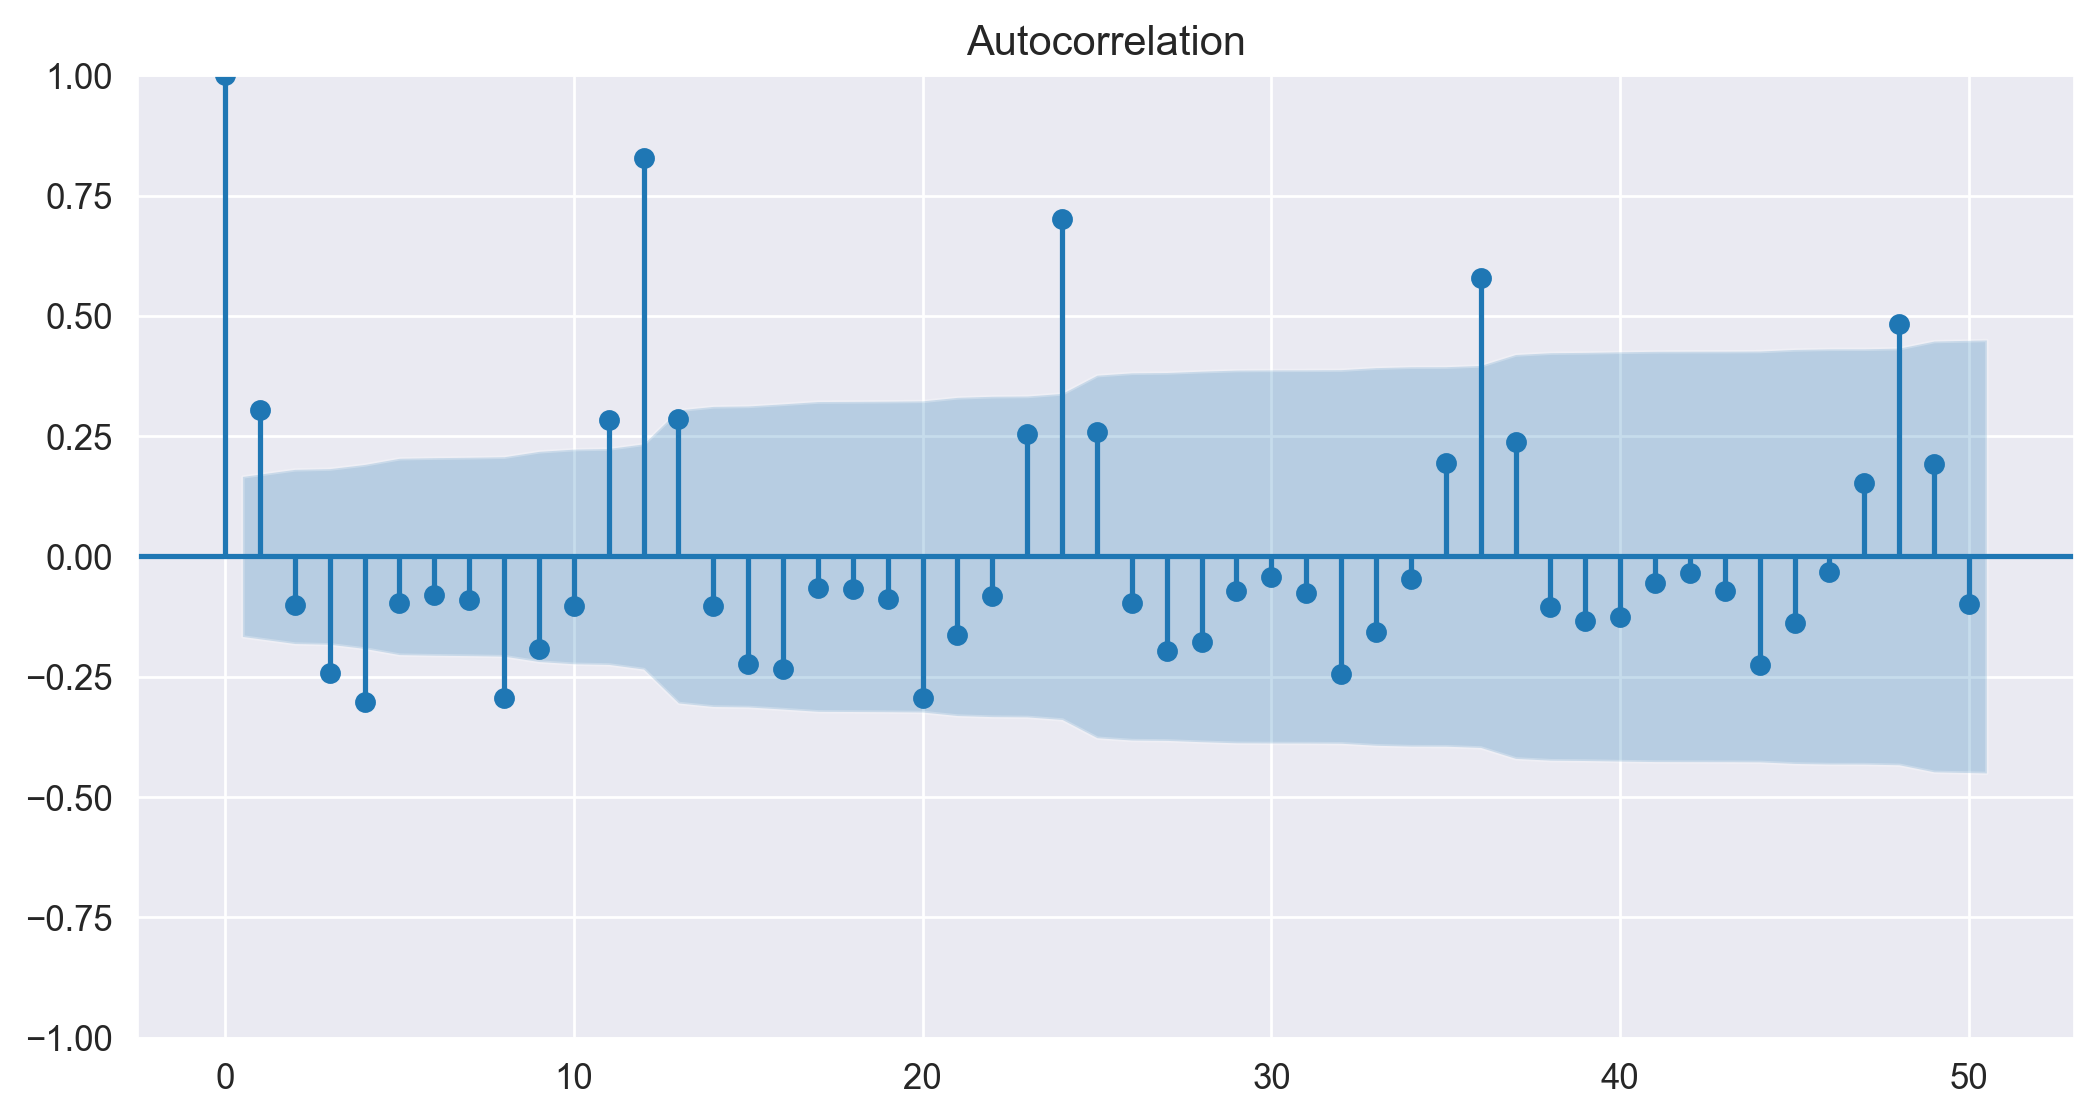

In [55]:
plot_acf(air["First"], lags = 50);

In [43]:
pacf_values = pacf(air["First"])
pacf_values

array([ 1.        ,  0.30611242, -0.21578704, -0.16605312, -0.23036537,
        0.01006424, -0.20108762, -0.16333616, -0.49330913, -0.28243247,
       -0.67695987, -0.44013467,  0.59845553, -0.05185665, -0.30710437,
        0.0062054 ,  0.14925935,  0.11699734, -0.1213624 , -0.00325437,
       -0.22351456, -0.12700165])

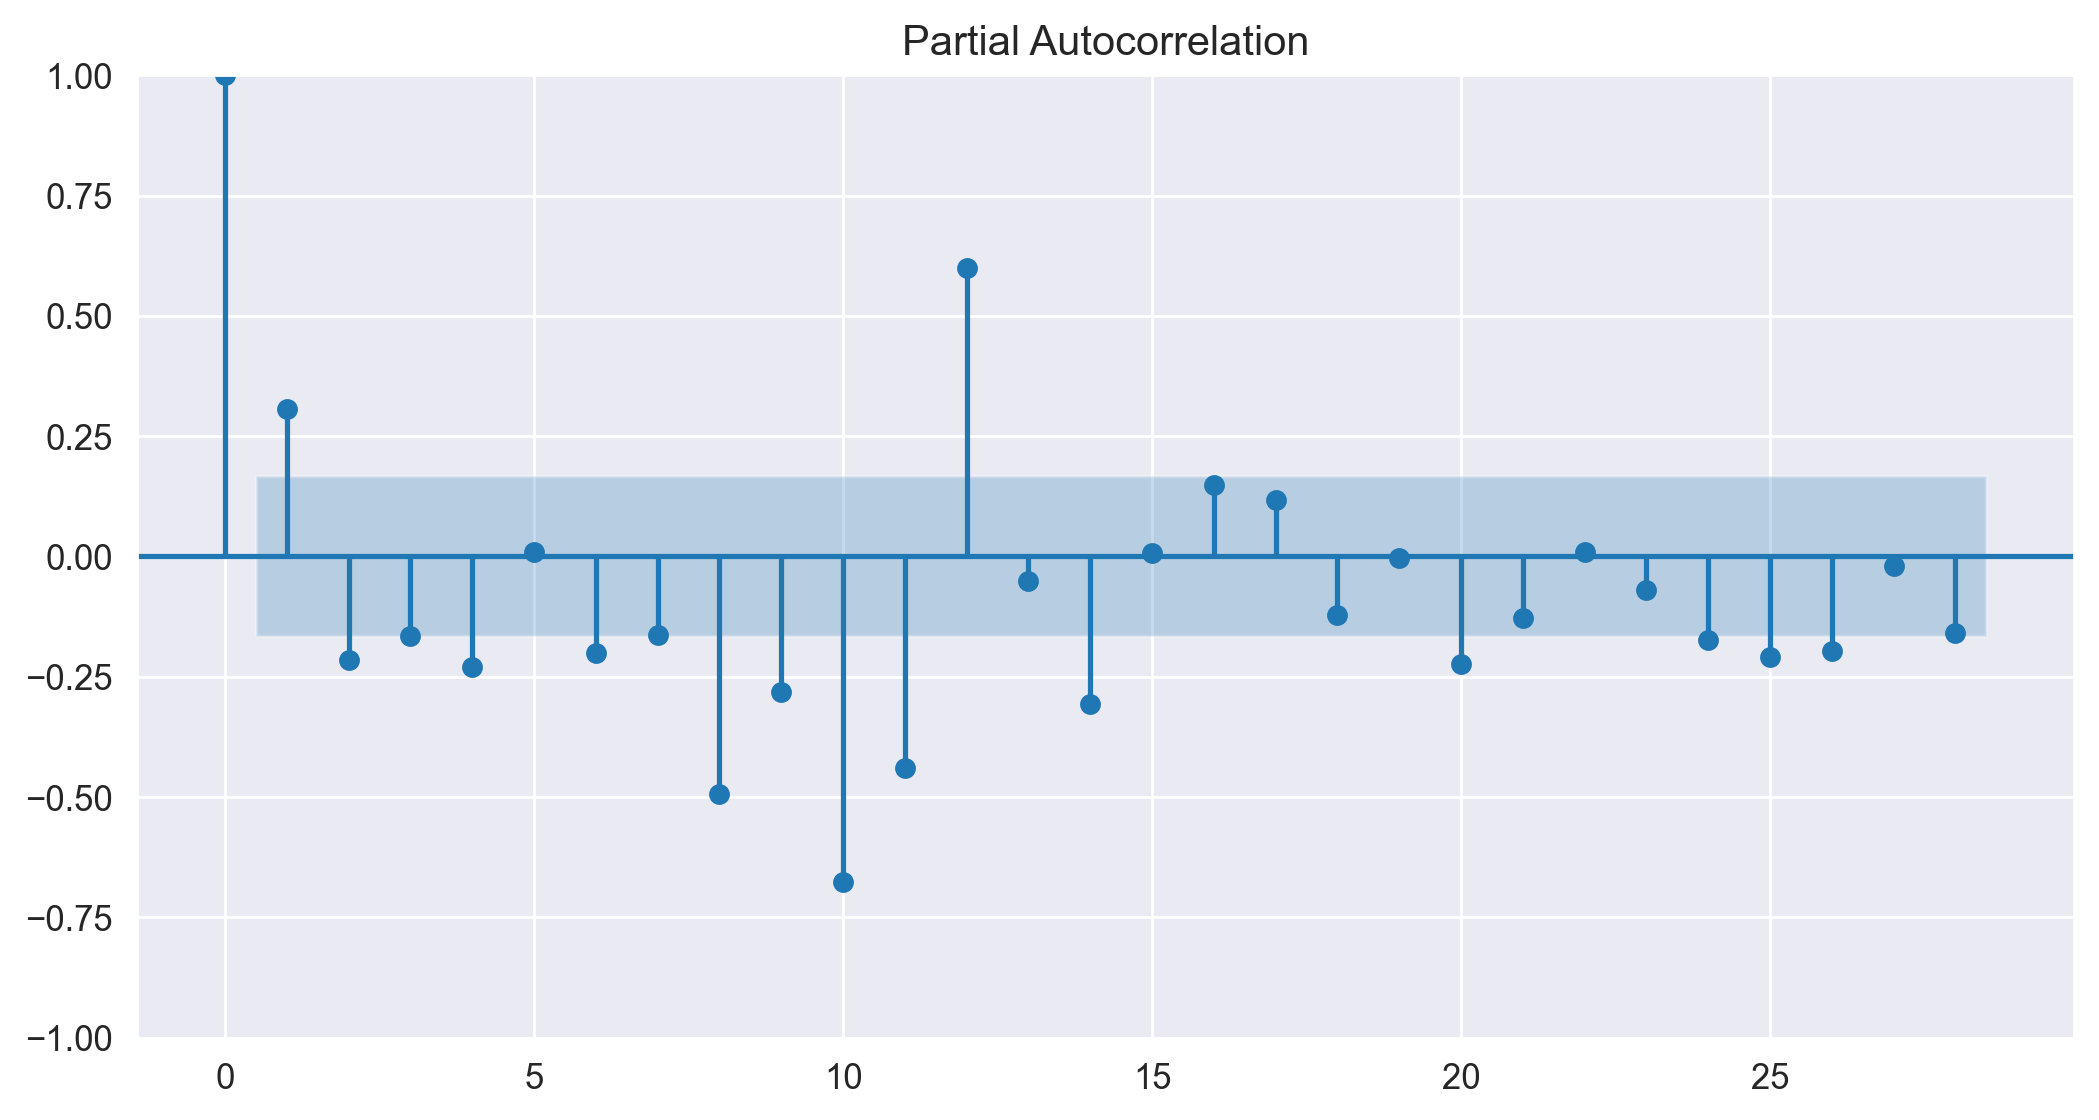

In [53]:
plot_pacf(air["First"], lags = 28);